In [ ]:
!https://www.kaggle.com/code/abdullahsaida011/zomato-eda/notebook?select=zomato.csv

In [6]:
!kaggle datasets download -d shrutimehta/zomato-restaurants-data

Dataset URL: https://www.kaggle.com/datasets/shrutimehta/zomato-restaurants-data
License(s): CC0-1.0
  0% 0.00/5.47M [00:00<?, ?B/s]
100% 5.47M/5.47M [00:00<00:00, 61.2MB/s]


In [7]:
!unzip /content/zomato-restaurants-data.zip

Archive:  /content/zomato-restaurants-data.zip
  inflating: Country-Code.xlsx       
  inflating: file1.json              
  inflating: file2.json              
  inflating: file3.json              
  inflating: file4.json              
  inflating: file5.json              
  inflating: zomato.csv              


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go

In [11]:
file_path = '/content/zomato.csv'
df = pd.read_csv(file_path, encoding='latin1')

In [13]:
df.sample(1)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
67,6713413,Les 3 Brasseurs,30,Sí£o Paulo,"Rua Jesuí_no Arruda, 470, Itaim Bibi, Sí£o Paulo",Itaim Bibi,"Itaim Bibi, Sí£o Paulo",-46.67511,-23.582135,"French, Brazilian, Beverages",...,Brazilian Real(R$),No,No,No,No,4,4.6,Dark Green,Excellent,30


In [14]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [15]:
df.shape

(9551, 21)

In [16]:
df.isna().sum()

,0
Restaurant ID,0
Restaurant Name,0
Country Code,0
City,0
Address,0
Locality,0
Locality Verbose,0
Longitude,0
Latitude,0
Cuisines,9


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

#Data Cleaning

In [22]:
null = df.isnull().sum()
null_percent =(null/ len(df))*100
print(null_percent)

Restaurant ID           0.000000
Restaurant Name         0.000000
Country Code            0.000000
City                    0.000000
Address                 0.000000
Locality                0.000000
Locality Verbose        0.000000
Longitude               0.000000
Latitude                0.000000
Cuisines                0.094231
Average Cost for two    0.000000
Currency                0.000000
Has Table booking       0.000000
Has Online delivery     0.000000
Is delivering now       0.000000
Switch to order menu    0.000000
Price range             0.000000
Aggregate rating        0.000000
Rating color            0.000000
Rating text             0.000000
Votes                   0.000000
dtype: float64


In [46]:
df['Cuisines'].fillna('Unknown', inplace=True)

In [47]:
df.shape

(9551, 21)

In [48]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [49]:
df2 = pd.read_excel("/content/Country-Code.xlsx")

In [50]:
df2

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [51]:
df['Country Code'].nunique()

15

In [52]:
df = pd.merge(df, df2, how='left',  on= "Country Code")

In [53]:
df.shape

(9551, 22)

In [54]:
df["Country"].value_counts()

,count
Country,
India,8652
United States,434
United Kingdom,80
Brazil,60
UAE,60
South Africa,60
New Zealand,40
Turkey,34
Australia,24


In [55]:
average_rating_by_Countries= df.groupby('Country')['Aggregate rating'].mean().reset_index()

sorted_average_rating = average_rating_by_Countries.sort_values(by='Aggregate rating', ascending=False)

sorted_average_rating

,Country,Aggregate rating
6,Phillipines,4.468182
11,Turkey,4.300000
4,Indonesia,4.295238
5,New Zealand,4.262500
12,UAE,4.233333
9,South Africa,4.210000
13,United Kingdom,4.087500
7,Qatar,4.060000
14,United States,4.004378
10,Sri Lanka,3.870000


<ipython-input-56-3a17247056a5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sorted_average_rating,y="Country",x="Aggregate rating" ,palette='viridis')


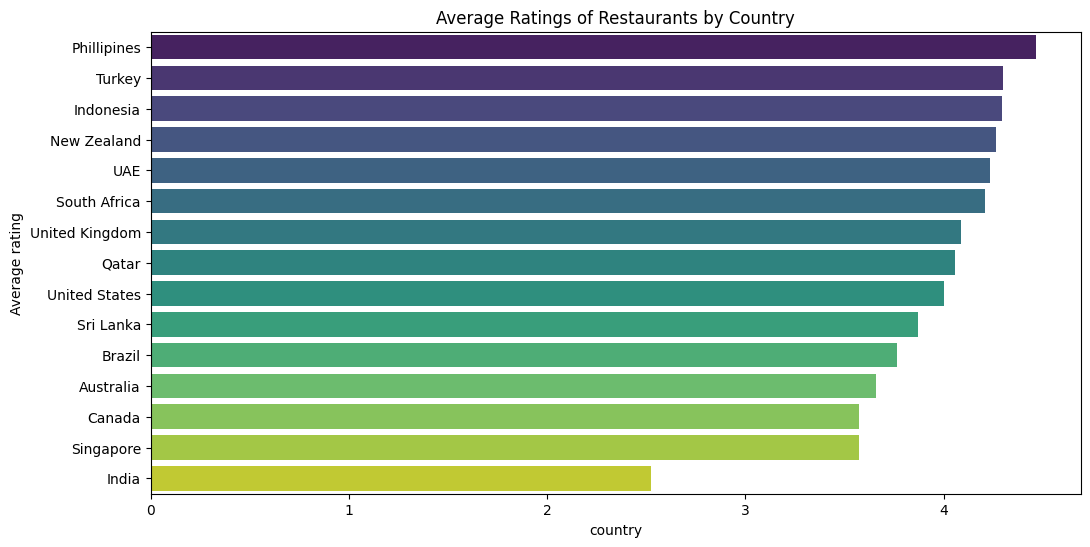

In [56]:
plt.figure(figsize=(12, 6))

sns.barplot(data=sorted_average_rating,y="Country",x="Aggregate rating" ,palette='viridis')

plt.xlabel("country")

plt.ylabel("Average rating")

plt.title('Average Ratings of Restaurants by Country')

plt.show()

In [60]:
Qatar=df[df["Country"]=="Qatar"]

Qatar["Restaurant Name"].unique()

array(['7st by Mumbai Spices', 'Indian Coffee House',
       'Zaffran Dining Experience', 'MRA Bakery Sweets & Restaurant',
       'Zaoq', 'Aalishan', "Applebee's", 'Mainland China Restaurant',
       'Ponderosa', 'Gokul Gujarati Restaurant',
       'The Manhattan FISH MARKET', 'Coral - InterContinental Doha',
       'Texas Roadhouse', 'Punjab Restaurant', 'Gymkhana', 'Eatopia',
       'Vine - The St. Regis', 'Sabai Thai - The Westin Doha Hotel & Spa',
       'Paper Moon', 'Roti & Boti'], dtype=object)

In [58]:
Restaurant = Qatar.groupby("Restaurant Name")['Aggregate rating'].mean().reset_index()

Resturant_top= Restaurant.sort_values(by='Aggregate rating', ascending=False)

Resturant_top=Resturant_top.head(5)

Resturant_top

,Restaurant Name,Aggregate rating
9,Mainland China Restaurant,4.9
6,Gymkhana,4.7
18,Zaffran Dining Experience,4.6
10,Paper Moon,4.5
17,Vine - The St. Regis,4.4


In [61]:
Qatar_top_rating = px.bar(Resturant_top, x="Restaurant Name", y="Aggregate rating", title="Top 5 Restaurants in Qatar",color ="Restaurant Name")

Qatar_top_rating.show()

In [62]:
df.groupby("Country")["Currency"].unique()

,Currency
Country,
Australia,[Dollar($)]
Brazil,[Brazilian Real(R$)]
Canada,[Dollar($)]
India,[Indian Rupees(Rs.)]
Indonesia,[Indonesian Rupiah(IDR)]
New Zealand,[NewZealand($)]
Phillipines,[Botswana Pula(P)]
Qatar,[Qatari Rial(QR)]
Singapore,[Dollar($)]


In [63]:
currency_mapping = {

    'Dollar($)': ('USD', 1),

    'Brazilian Real(R$)': ('BRL', 0.19),

    'Indian Rupees(Rs.)': ('INR', 0.012),

    'Indonesian Rupiah(IDR)': ('IDR', 0.000067),

    'NewZealand($)': ('NZD', 0.65),

    'Botswana Pula(P)': ('BWP', 0.090),

    'Qatari Rial(QR)': ('QAR', 0.27),

    'Rand(R)': ('ZAR', 0.053),

    'Sri Lankan Rupee(LKR)': ('LKR', 0.0030),

    'Turkish Lira(TL)': ('TRY', 0.038),

    'Emirati Diram(AED)': ('AED', 0.27),

    'Pounds(£)': ('GBP', 1.36)

}

def convert_to_usd(row):

    currency_text = row['Currency']

    amount = row['Average Cost for two']

    currency_info = currency_mapping.get(currency_text, None)

    if currency_info is None:

        return None

    else:

        currency_code, conversion_rate = currency_info

        converted_amount = amount * conversion_rate

        return round(converted_amount, 2)

df['Average Cost for two Dollar($)'] = df.apply(convert_to_usd, axis=1)

df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country,Average Cost for two Dollar($)
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines,99.00
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines,108.00
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,No,No,No,4,4.4,Green,Very Good,270,Phillipines,360.00
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines,135.00
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines,135.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,No,No,No,3,4.1,Green,Very Good,788,Turkey,3.04
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,3,4.2,Green,Very Good,1034,Turkey,3.99
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,4,3.7,Yellow,Good,661,Turkey,6.46
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,4,4.0,Green,Very Good,901,Turkey,4.56


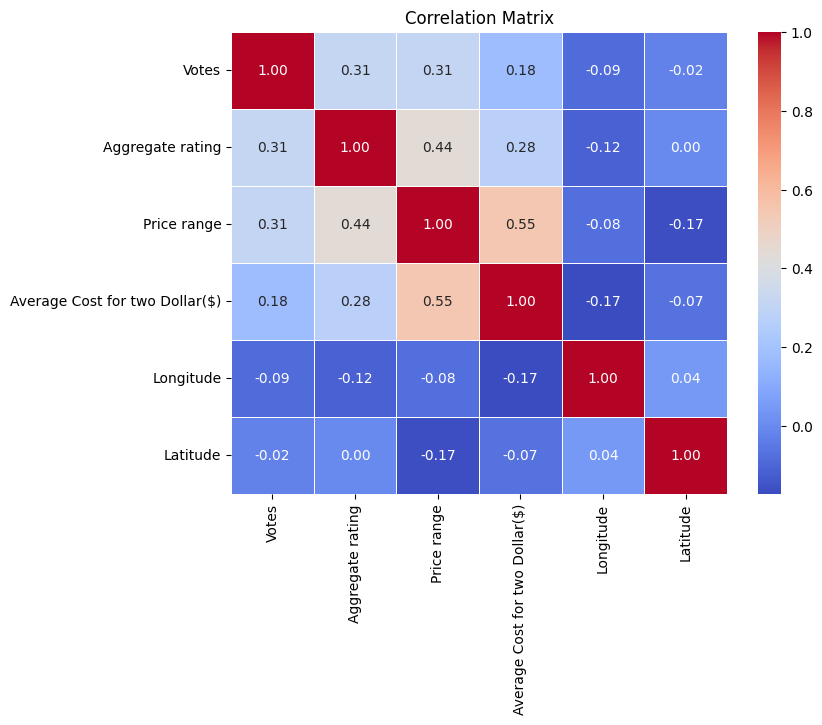

In [64]:
columns_to_analyze = ['Votes', 'Aggregate rating', 'Price range', 'Average Cost for two Dollar($)','Longitude', 'Latitude']

correlation_matrix = df[columns_to_analyze].corr()

plt.figure(figsize=(8, 6))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

plt.title('Correlation Matrix')

plt.show()

In [65]:
Average_cost_by_country = df.groupby("Country")["Average Cost for two Dollar($)"].mean().reset_index()

Average_cost_by_country = Average_cost_by_country.sort_values(by=["Average Cost for two Dollar($)"],ascending = False)

Average_cost_by_country=Average_cost_by_country.head()

Average_cost_by_country

,Country,Average Cost for two Dollar($)
8,Singapore,155.750000
6,Phillipines,144.613636
13,United Kingdom,65.025000
7,Qatar,60.412500
5,New Zealand,45.337500


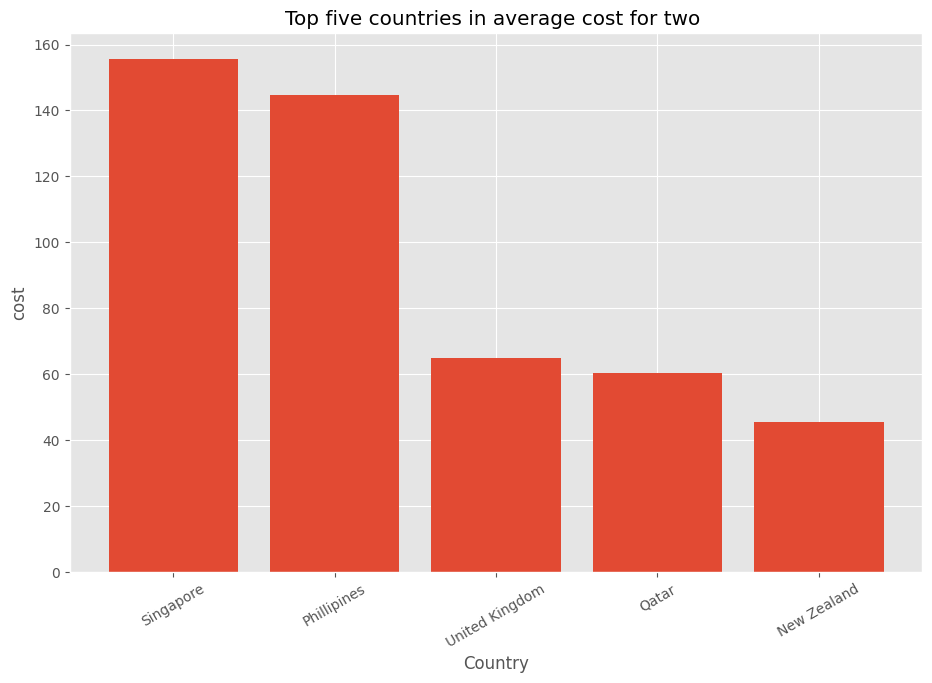

In [66]:
plt.figure(figsize=(11,7))

plt.style.use('ggplot')

x=Average_cost_by_country["Country"]

y=Average_cost_by_country["Average Cost for two Dollar($)"]

plt.bar(x,y)

plt.title("Top five countries in average cost for two ")

plt.xlabel("Country")

plt.ylabel("cost")

plt.xticks(rotation = 30)

plt.show()

In [70]:
Average_cost_by_country = df.groupby("Country")["Average Cost for two Dollar($)"].mean().reset_index()

Average_cost_by_country = Average_cost_by_country.sort_values(by=["Average Cost for two Dollar($)"],ascending = True)

Average_cost_by_country = Average_cost_by_country.head()

Average_cost_by_country

,Country,Average Cost for two Dollar($)
11,Turkey,3.224412
10,Sri Lanka,7.125000
3,India,7.480444
4,Indonesia,18.839524
9,South Africa,22.245833


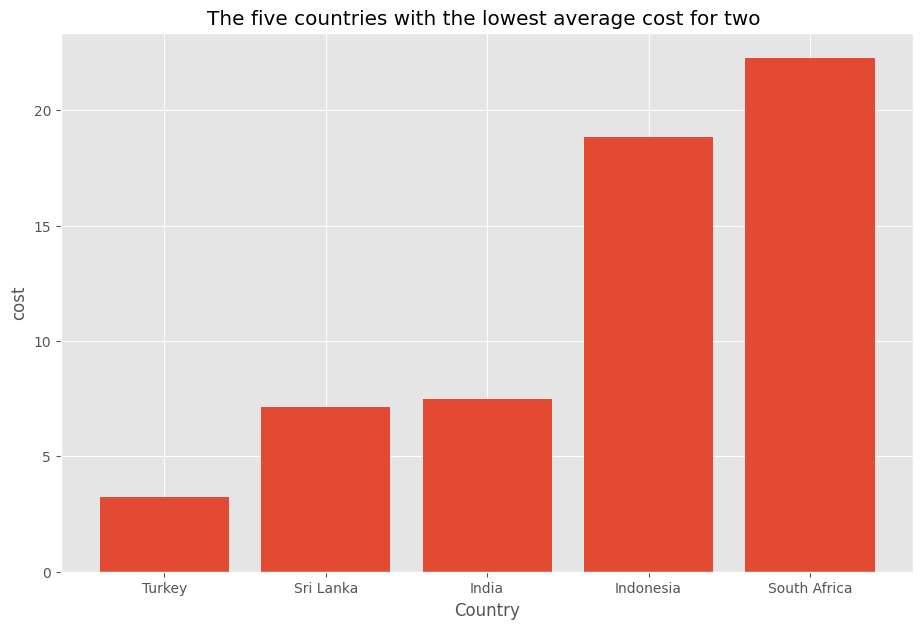

In [71]:
plt.figure(figsize=(11,7))

plt.style.use('ggplot')

x=Average_cost_by_country["Country"]

y=Average_cost_by_country["Average Cost for two Dollar($)"]

plt.bar(x,y)

plt.title("The five countries with the lowest average cost for two ")

plt.xlabel("Country")

plt.ylabel("cost")

plt.show()

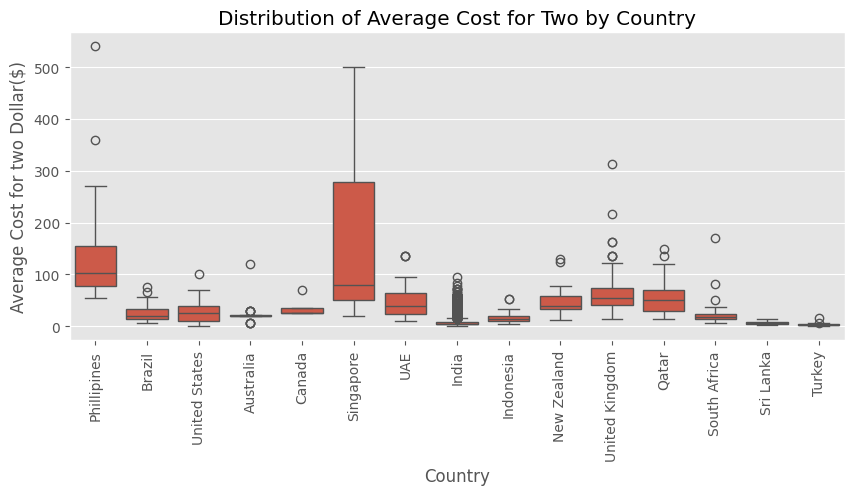

In [85]:
plt.figure(figsize=(10, 4))

sns.boxplot(x='Country', y='Average Cost for two Dollar($)', data=df)

plt.title('Distribution of Average Cost for Two by Country')

plt.xticks(rotation=90)

plt.show()

In [77]:
united_State = df[df["Country"]=="United States"]

In [78]:
united_State_Rating = united_State.groupby(['City', 'Price range', 'Cuisines'])['Aggregate rating'].mean().reset_index()

pivot_data = united_State_Rating.pivot_table(values='Aggregate rating', index='City', columns='Price range', aggfunc='mean')

pivot_data

Price range,1,2,3,4
City,,,,
Albany,3.551852,3.520000,3.675000,3.500000
Athens,4.208333,4.150000,4.250000,NaN
Augusta,4.033333,4.033333,4.300000,NaN
Boise,4.316667,4.312500,4.133333,4.000000
Cedar Rapids/Iowa City,4.380000,4.156250,4.000000,NaN
Clatskanie,4.300000,NaN,NaN,NaN
Cochrane,NaN,3.100000,NaN,NaN
Columbus,3.800000,4.137500,3.985714,NaN
Dalton,4.181818,4.066667,3.800000,NaN


<Figure size 1000x600 with 0 Axes>

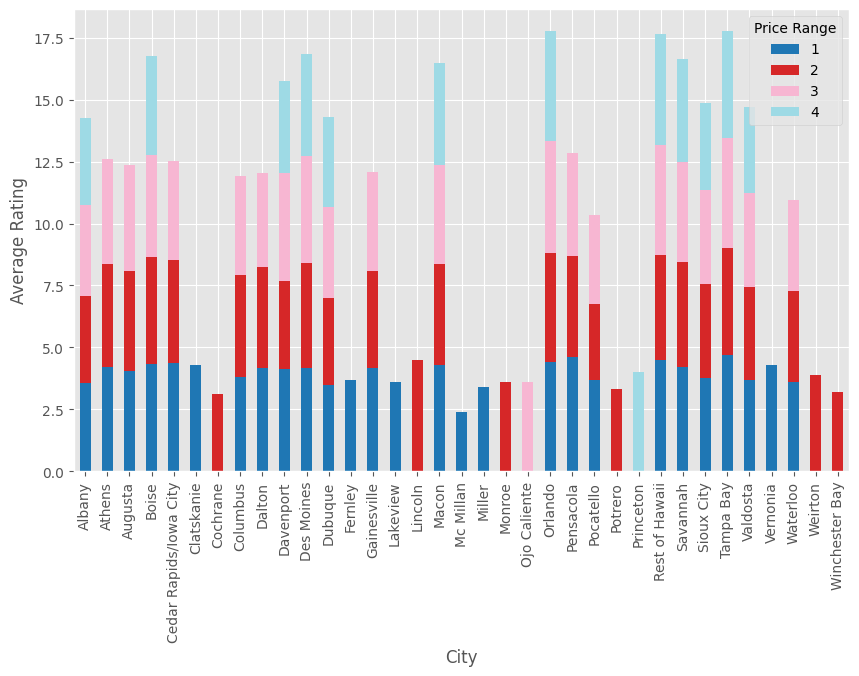

In [79]:
plt.figure(figsize=(10, 6))

pivot_data.plot( kind='bar', stacked=True, figsize=(10, 6), cmap='tab20')

plt.xlabel('City')

plt.ylabel('Average Rating')

plt.xticks(rotation=90)

plt.legend(title='Price Range')

plt.show()

In [80]:
df_cuisines = df.copy()

df_cuisines['Cuisines_split'] = df_cuisines['Cuisines'].str.split(', ')

df_cuisines = df_cuisines .explode('Cuisines_split')

In [81]:
average_ratings_by_cuisine = df_cuisines.groupby('Cuisines_split')['Aggregate rating'].mean().reset_index()

average_ratings_by_cuisine = average_ratings_by_cuisine.sort_values(by='Aggregate rating', ascending=False)

average_ratings_by_cuisine = average_ratings_by_cuisine.head(10)

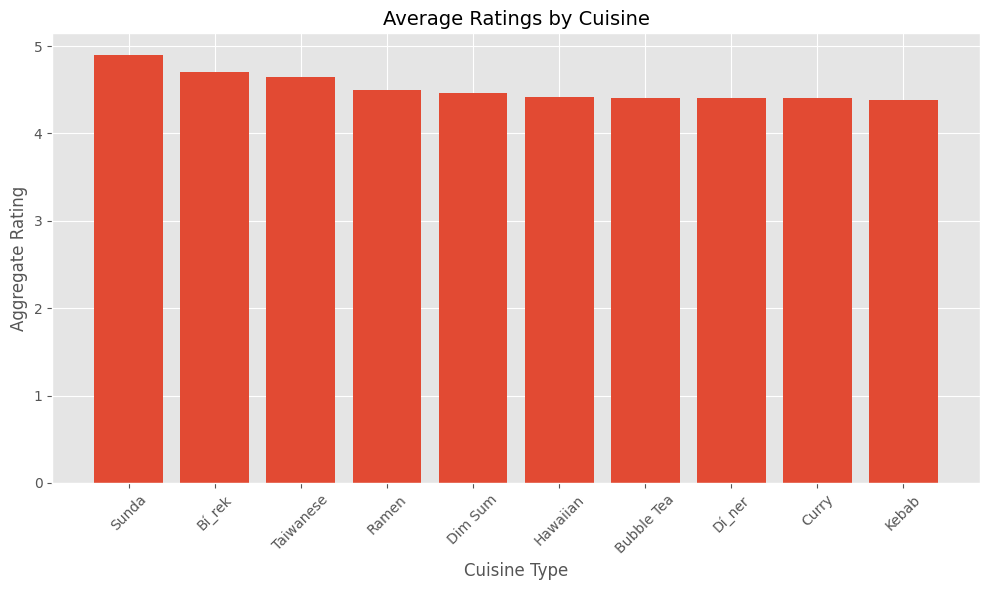

In [82]:
plt.figure(figsize=(10, 6))

plt.style.use('ggplot')

plt.bar(average_ratings_by_cuisine["Cuisines_split"], average_ratings_by_cuisine["Aggregate rating"])



plt.xlabel('Cuisine Type', fontsize=12)

plt.ylabel('Aggregate Rating', fontsize=12)

plt.title('Average Ratings by Cuisine', fontsize=14)

plt.xticks(rotation=45)

plt.tight_layout()

plt.show()


In [83]:
Online_delivery = df['Has Online delivery'].map({'Yes': 1, 'No': 0})

Online_delivery = Online_delivery.value_counts()

Online_delivery

,count
Has Online delivery,
0,7100
1,2451


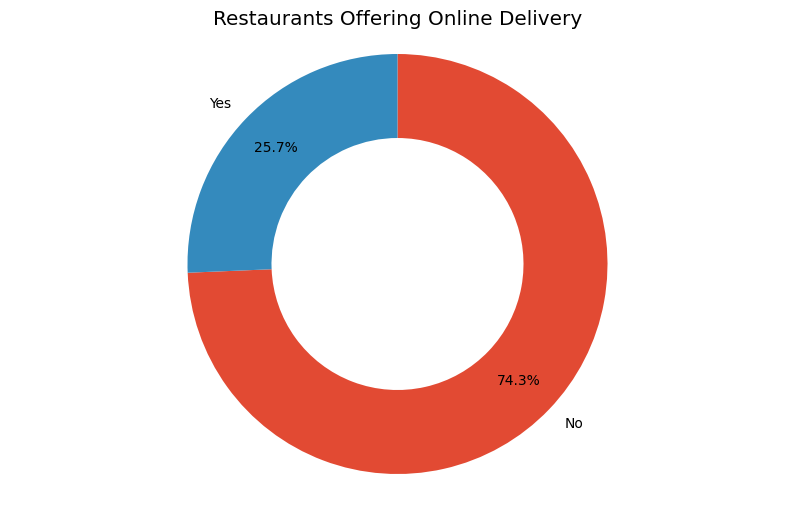

In [86]:
plt.figure(figsize=(10, 6))

plt.style.use('ggplot')

plt.pie(Online_delivery, labels=['No', 'Yes'], autopct='%1.1f%%', startangle=90, counterclock=False ,wedgeprops=dict(width=0.4),pctdistance=0.8)

centre_circle = plt.Circle((0, 0), 0.55, fc='white')

plt.gca().add_artist(centre_circle)

plt.axis('equal')

plt.title('Restaurants Offering Online Delivery')

plt.show()

In [87]:
online_delivery_by_country = df.groupby('Country')['Has Online delivery'].value_counts().unstack().fillna(0)

In [89]:
restaurant_counts = df['Country'].value_counts().reset_index()

In [90]:
fig = px.treemap(restaurant_counts,

                 path=['Country'],

                 values='count',

                 title='Number of Restaurants for each Country')

fig.show()

In [91]:
df_us = df[df["Country"]=="United States"]

restaurant_counts = df_us['City'].value_counts().reset_index()

In [92]:
fig = px.treemap(restaurant_counts,

                 path=['City'],

                 values='count',

                 title='Number of Restaurants for each Country')

fig.show()

In [94]:
rating_distribution = df.groupby(['Country', 'City'])['Aggregate rating'].mean().reset_index()

In [95]:
fig = px.sunburst(rating_distribution, path=['Country', 'City'],)
fig.show()

In [96]:
rating_distribution = df.groupby(['Country', 'City'])['Aggregate rating'].mean().reset_index()
fig = px.scatter(rating_distribution,x='City',  y='Aggregate rating',
                 color='Country',
                 hover_name='City', title='Average rating by City and Country',labels={'Aggregate Rating', 'City'},size_max=60)
fig.show()

In [101]:
import plotly.figure_factory as ff
hist_data=[df["Price range"]]
group_labels=["RATES"]
fig=ff.create_distplot(hist_data,group_labels,bin_size=.1)
fig.show()